## Financial analysis: Portfolio management

## Forecasting the closing price

#### Importing necessary libries

In [1]:
import sys
import os

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# sns.set_theme(style='whitegrid')
sns.set_theme('notebook')

In [50]:
sys.path.append(os.path.abspath('../scripts'))
from plotting import Plots
from utils import Utils
from logger import LOGGER
from model_utils import ModelUtil

plots = Plots()
logger = LOGGER
model_util = ModelUtil()

data_dir =  os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('notebooks'))), 'data')

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data for tesla, Vanguard Total Bond Market ETF and S&p 500
tsla, bnd, sp500 = Utils.get_price_data()

2024-11-13 15:18 - INFO :: Fetching data took 2.91s


In [4]:
# Adding addiotiona features
tsla = Utils.volatility_indicators(tsla)
bnd = Utils.volatility_indicators(bnd)
sp500 = Utils.volatility_indicators(sp500)

In [5]:
tsla = tsla.drop(['Open', 'High', 'Low', 'Volume'],axis=1)
bnd = bnd.drop(['Open', 'High', 'Low', 'Volume'],axis=1)
sp500 = sp500.drop(['Open', 'High', 'Low', 'Volume'],axis=1)

#### Tesla price forecast with SARIMAX

In [10]:
Sarimax_model_tsla = model_util.train_Arima_model(tsla, test_size=60, model_name = "SARIMAX" ,exogenous=True)

2024-11-13 10:27 - INFO :: Training SARIMAX started ....


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=16919.975, Time=36.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=16918.241, Time=2.32 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=14298.112, Time=18.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=15512.487, Time=23.56 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=16918.633, Time=2.79 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=14261.365, Time=3.56 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=14340.288, Time=21.50 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=14298.773, Time=22.12 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=14262.442, Time=12.77 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=15512.528, Time=11.73 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=14253.915, Time=3.25 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=14299.352, Time=18.21 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=14309.044, Time=19.94 sec
 ARIMA(1,0,0)(1,0,1)[12]             : AIC=14289.261, Time=21.84

2024-11-13 10:31 - INFO :: Training SARIMAX took 243.72 seconds


 ARIMA(0,0,1)(0,0,0)[12]             : AIC=15511.495, Time=12.22 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12]          
Total fit time: 243.646 seconds


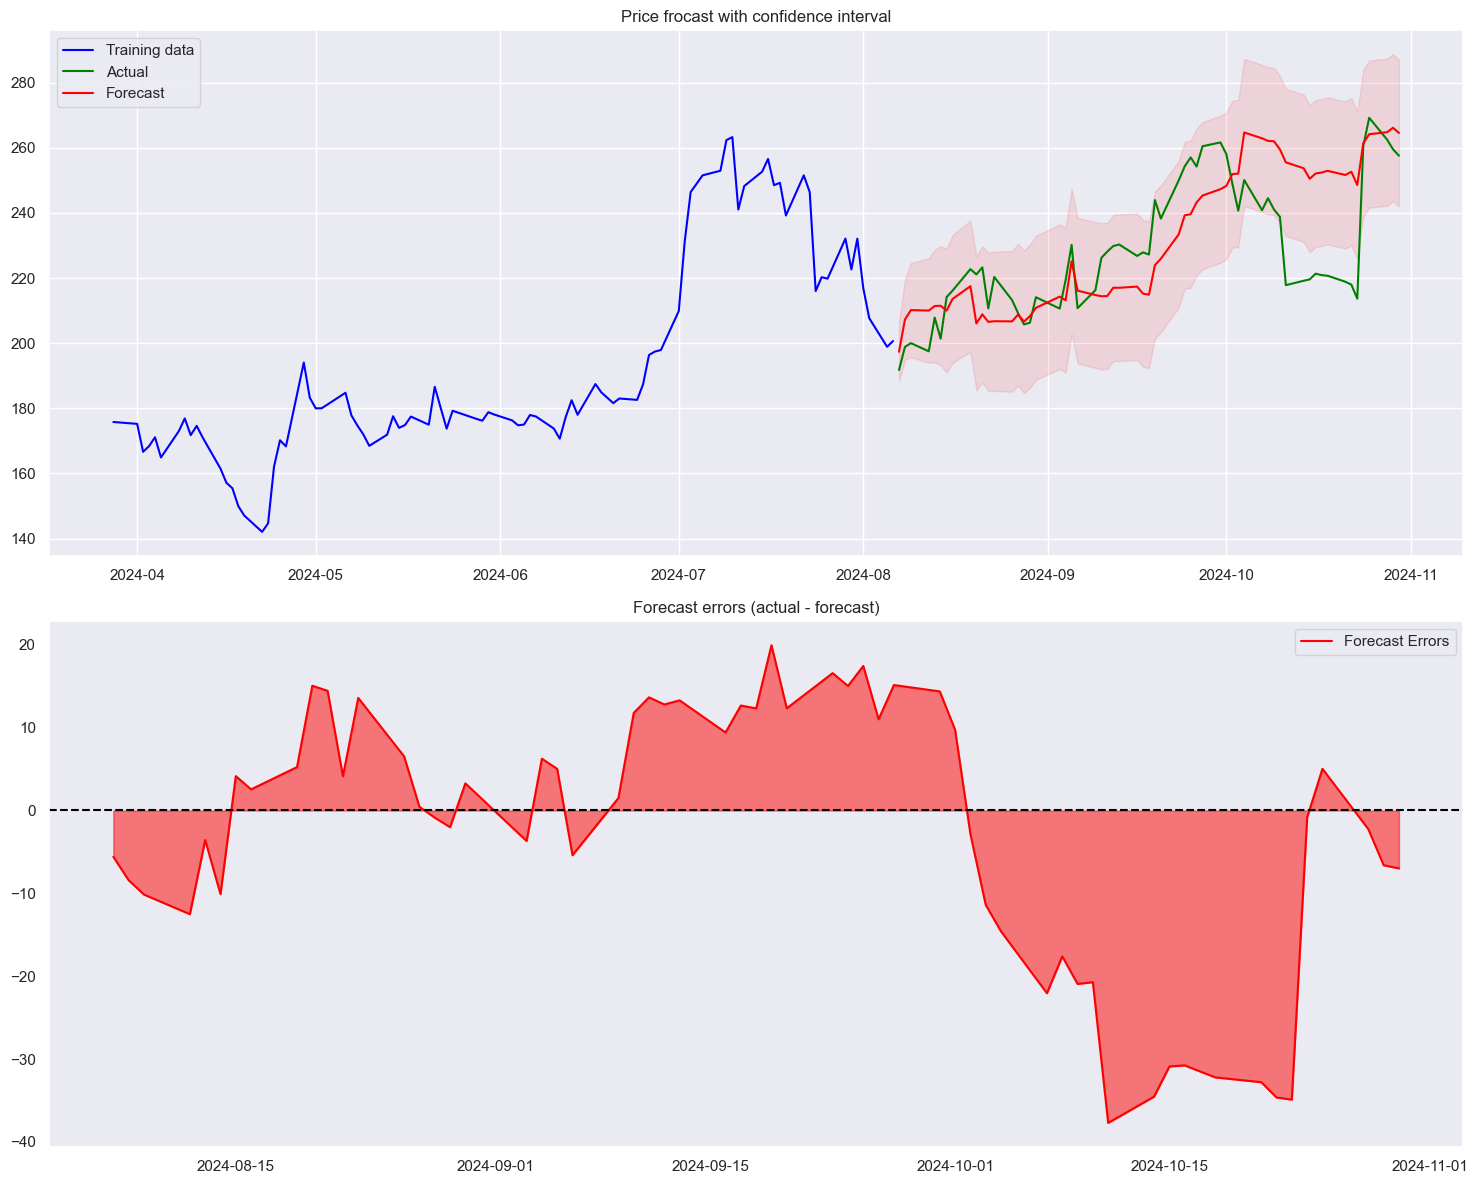

In [13]:
model_util.plot_model_forecast(Sarimax_model_tsla,tsla,"SARIMAX", 60)

#### Vangard total bond ETF price forecast with SARIMAX

In [11]:
Sarimax_model_bnd = model_util.train_Arima_model(bnd, test_size=60, model_name = "SARIMAX" ,exogenous=True)

2024-11-13 10:31 - INFO :: Training SARIMAX started ....


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1591.565, Time=5.41 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1573.049, Time=0.99 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-823.682, Time=23.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=136.571, Time=25.57 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1571.055, Time=2.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-816.130, Time=3.41 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-812.529, Time=46.33 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-801.993, Time=26.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-794.430, Time=23.00 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-795.737, Time=57.30 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1566.684, Time=5.65 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-825.133, Time=21.65 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-820.227, Time=12.73 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=-828.055, Time=44.30 sec
 ARIMA(1,0,

2024-11-13 10:39 - INFO :: Training SARIMAX took 468.14 seconds


 ARIMA(1,0,1)(2,0,0)[12]             : AIC=-825.724, Time=41.39 sec

Best model:  ARIMA(1,0,1)(2,0,0)[12] intercept
Total fit time: 467.989 seconds


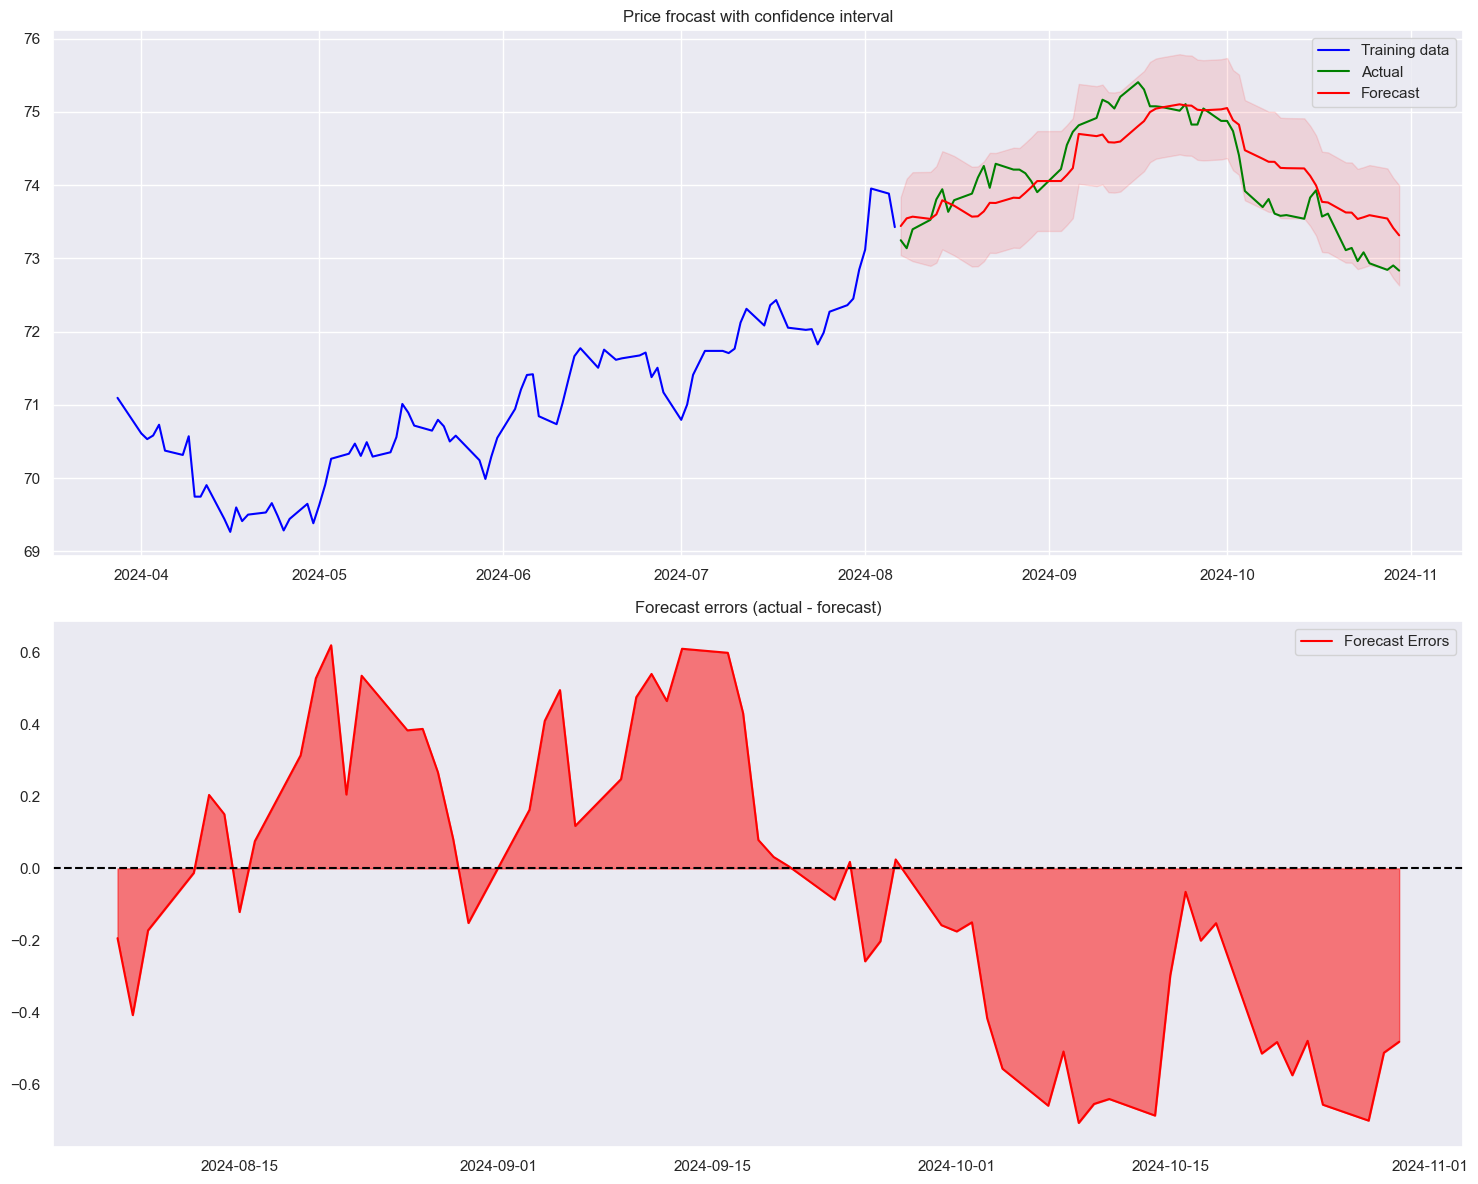

In [14]:
model_util.plot_model_forecast(Sarimax_model_bnd,bnd,"SARIMAX", 60)

#### S&P 500 ETF price forecast with SARIMAX

In [12]:
Sarimax_model_sp500 = model_util.train_Arima_model(sp500, test_size=60, model_name = "SARIMAX" ,exogenous=True)

2024-11-13 10:39 - INFO :: Training SARIMAX started ....


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=14525.388, Time=14.17 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=14541.180, Time=3.15 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12217.501, Time=21.63 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=13197.793, Time=24.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=14544.130, Time=3.19 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=12210.470, Time=3.48 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=12256.025, Time=22.01 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=12262.346, Time=21.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=12209.436, Time=14.18 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=12260.912, Time=23.44 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=12273.446, Time=23.09 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=12256.475, Time=24.13 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=13207.095, Time=11.96 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=12205.596, Time=13.3

2024-11-13 10:46 - INFO :: Training SARIMAX took 428.87 seconds


 ARIMA(0,0,0)(1,0,0)[12]             : AIC=14527.135, Time=15.57 sec

Best model:  ARIMA(1,0,1)(1,0,0)[12]          
Total fit time: 428.786 seconds


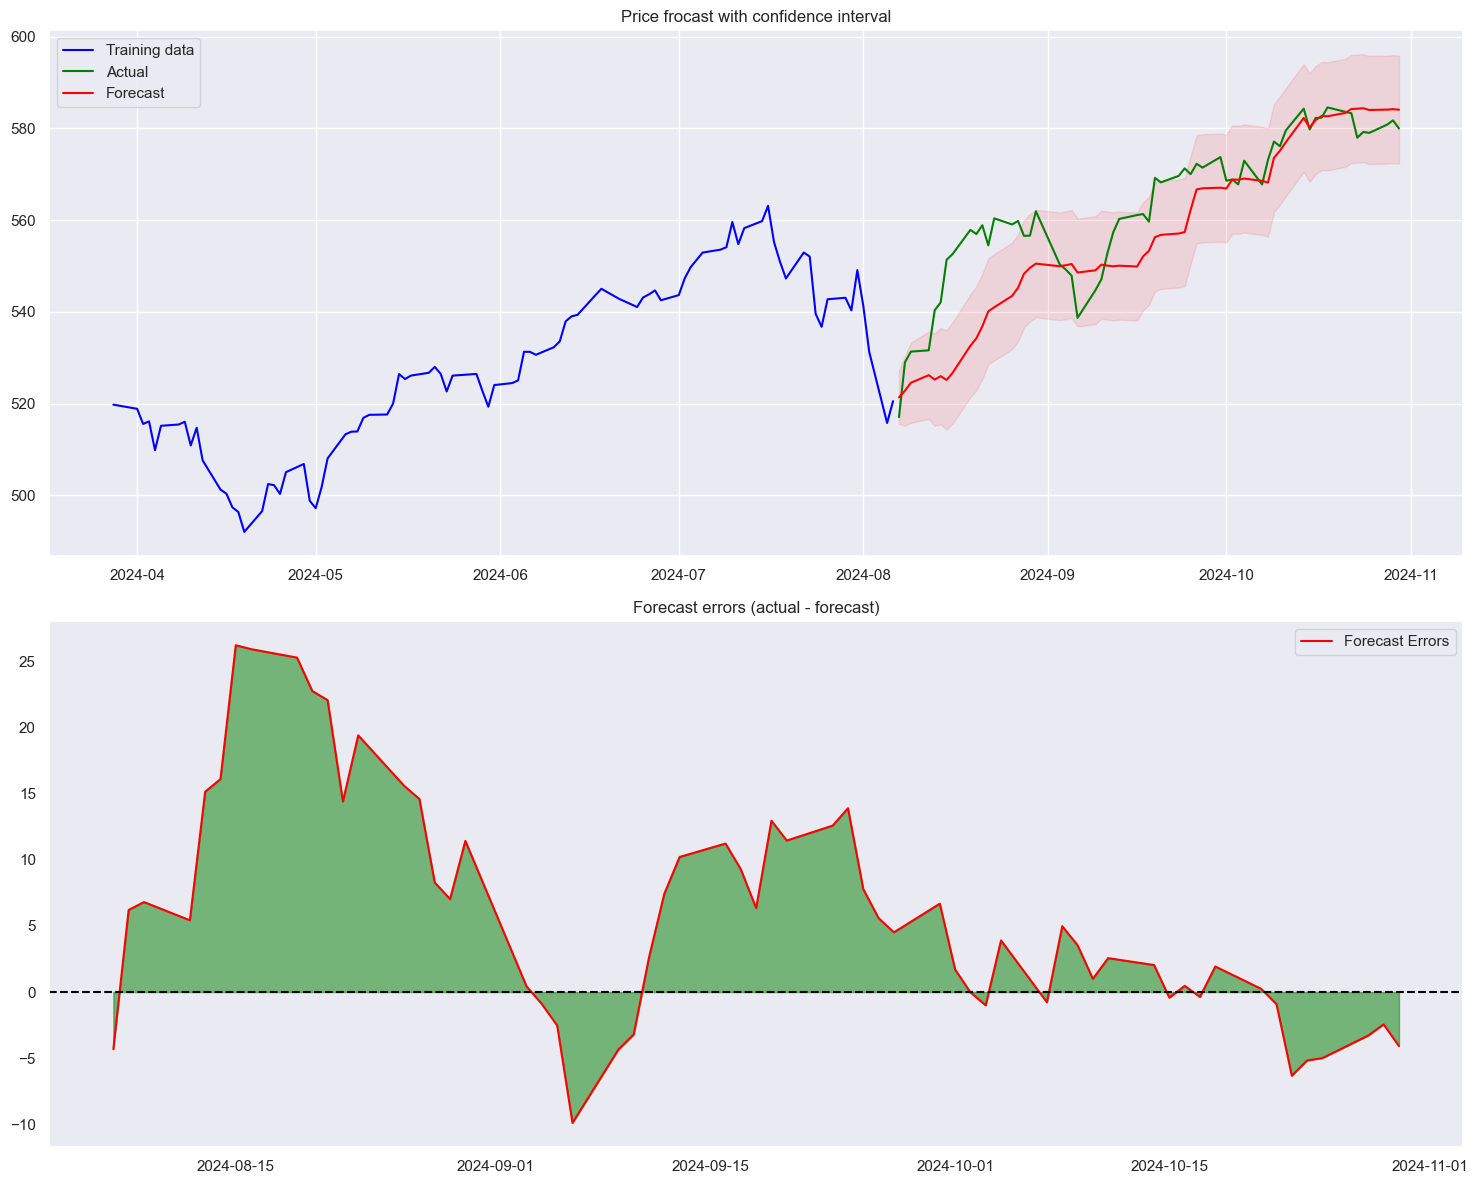

In [15]:
model_util.plot_model_forecast(Sarimax_model_sp500,sp500,"SARIMAX", 60)

#### LSTM Models

#### Tesla price forecast 

In [16]:
# the sequence lenght is 63 days to capture 1 quarter of trading days
LSTM_model, history = model_util.train_lstm(tsla, 60,'LSTM', 'TSLA')

2024-11-13 15:23 - INFO :: Training LSTM model for TSLA...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

2024-11-13 15:24 - INFO :: Model training took 41.25 seconds


Model saved as ../Models/TSLA-13-11-2024-15-24-37-00.pkl


In [19]:
forecast = model_util.lstm_predict_future(tsla, 'Close', '../Models/TSLA-13-11-2024-13-00-30-00.pkl', '../Models/TSLA-scaler.joblib', 253)
forecast['Close'] = forecast['Close'].apply(lambda x: x[0][0])

In [20]:
model_util.plot_forecast('Close', tsla, forecast, 0.05)

In [51]:
tsla_price = pd.concat([pd.DataFrame(tsla['Close']), forecast], axis=0)
tsla_price.to_csv('../data/Tesla_price.csv', index=False)

#### Vangard total bond ETF price forecast 

In [21]:
# the sequence lenght is 60 days to capture 1 quarter of trading days
LSTM_model_bnd, history = model_util.train_lstm(bnd, 60,'LSTM', 'Vangard-bond')

2024-11-13 15:28 - INFO :: Training LSTM model for Vangard-bond...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

2024-11-13 15:28 - INFO :: Model training took 37.91 seconds


Model saved as ../Models/Vangard-bond-13-11-2024-15-28-50-00.pkl


In [23]:
forecast_bnd = model_util.lstm_predict_future(bnd, 'Close', '../Models/Vangard-bond-13-11-2024-15-28-50-00.pkl', '../Models/Vangard-bond-scaler.joblib', 253)
forecast_bnd['Close'] = forecast_bnd['Close'].apply(lambda x: x[0][0])

In [24]:
model_util.plot_forecast('Close', bnd, forecast_bnd, 0.05)

In [52]:
bnd_price = pd.concat([pd.DataFrame(bnd['Close']), forecast_bnd], axis=0)
bnd_price.to_csv('../data/Vangard_bond_price.csv', index=False)

#### S&P 500 ETF price forecast

In [40]:
# the sequence lenght is 60 days to capture 1 quarter of trading days
LSTM_model_sp500, history = model_util.train_lstm(sp500, 120,'LSTM', 'S&P-500')

2024-11-13 15:45 - INFO :: Training LSTM model for S&P-500...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 120, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

2024-11-13 15:46 - INFO :: Model training took 43.7 seconds


Model saved as ../Models/S&P-500-13-11-2024-15-46-32-00.pkl


In [41]:
forecast_sp500 = model_util.lstm_predict_future(sp500, 'Close', '../Models/S&P-500-13-11-2024-15-46-32-00.pkl', '../Models/S&P 500-scaler.joblib', 253)
forecast_sp500['Close'] = forecast_sp500['Close'].apply(lambda x: x[0][0])

In [42]:
model_util.plot_forecast('Close', sp500, forecast_sp500, 0.05)

In [53]:
sp500_price = pd.concat([pd.DataFrame(sp500['Close']), forecast_sp500], axis=0)
sp500_price.to_csv('../data/S&P500_ETF_price.csv', index=False)